# Libraries

In [1]:
# Import all necessary libraries for data processing, modeling, and evaluation
import numpy as np
import os

# Import custom functions from the project modules
from src.data_ops import load_heart_disease_data, preprocess_heart_disease_data, find_outliers
from src.models import compare_model_statistics, pairwise_model_comparison, print_statistical_summary
from src.plots import plot_auc_boxplots, plot_hyperparameter_distributions, plot_continuous_distributions_with_qq, plot_correlation_heatmap

print("All libraries imported successfully")

All libraries imported successfully


# Data Loading and Pre-Processing

DATA LOADING
Loading heart disease dataset from UCI repository
Dataset loaded successfully
  - Features shape: (303, 13)
  - Target shape: (303,)
  - Target distribution:
num
0    164
1    139
Name: count, dtype: int64

DATA PREPROCESSING
Preprocessing dataset
Number of NA values per column:
ca      4
thal    2
dtype: int64
Total NA values: 6
NA values removed

Outliers:

trestbps    9
chol        5
thalach     1
age         0
oldpeak     5
dtype: int64
Total outliers: 20

Preprocessing completed
  - Final dataset shape: (297, 14)
  - Number of features: 13
  - Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Plot distribution and qq-plots of continuous features


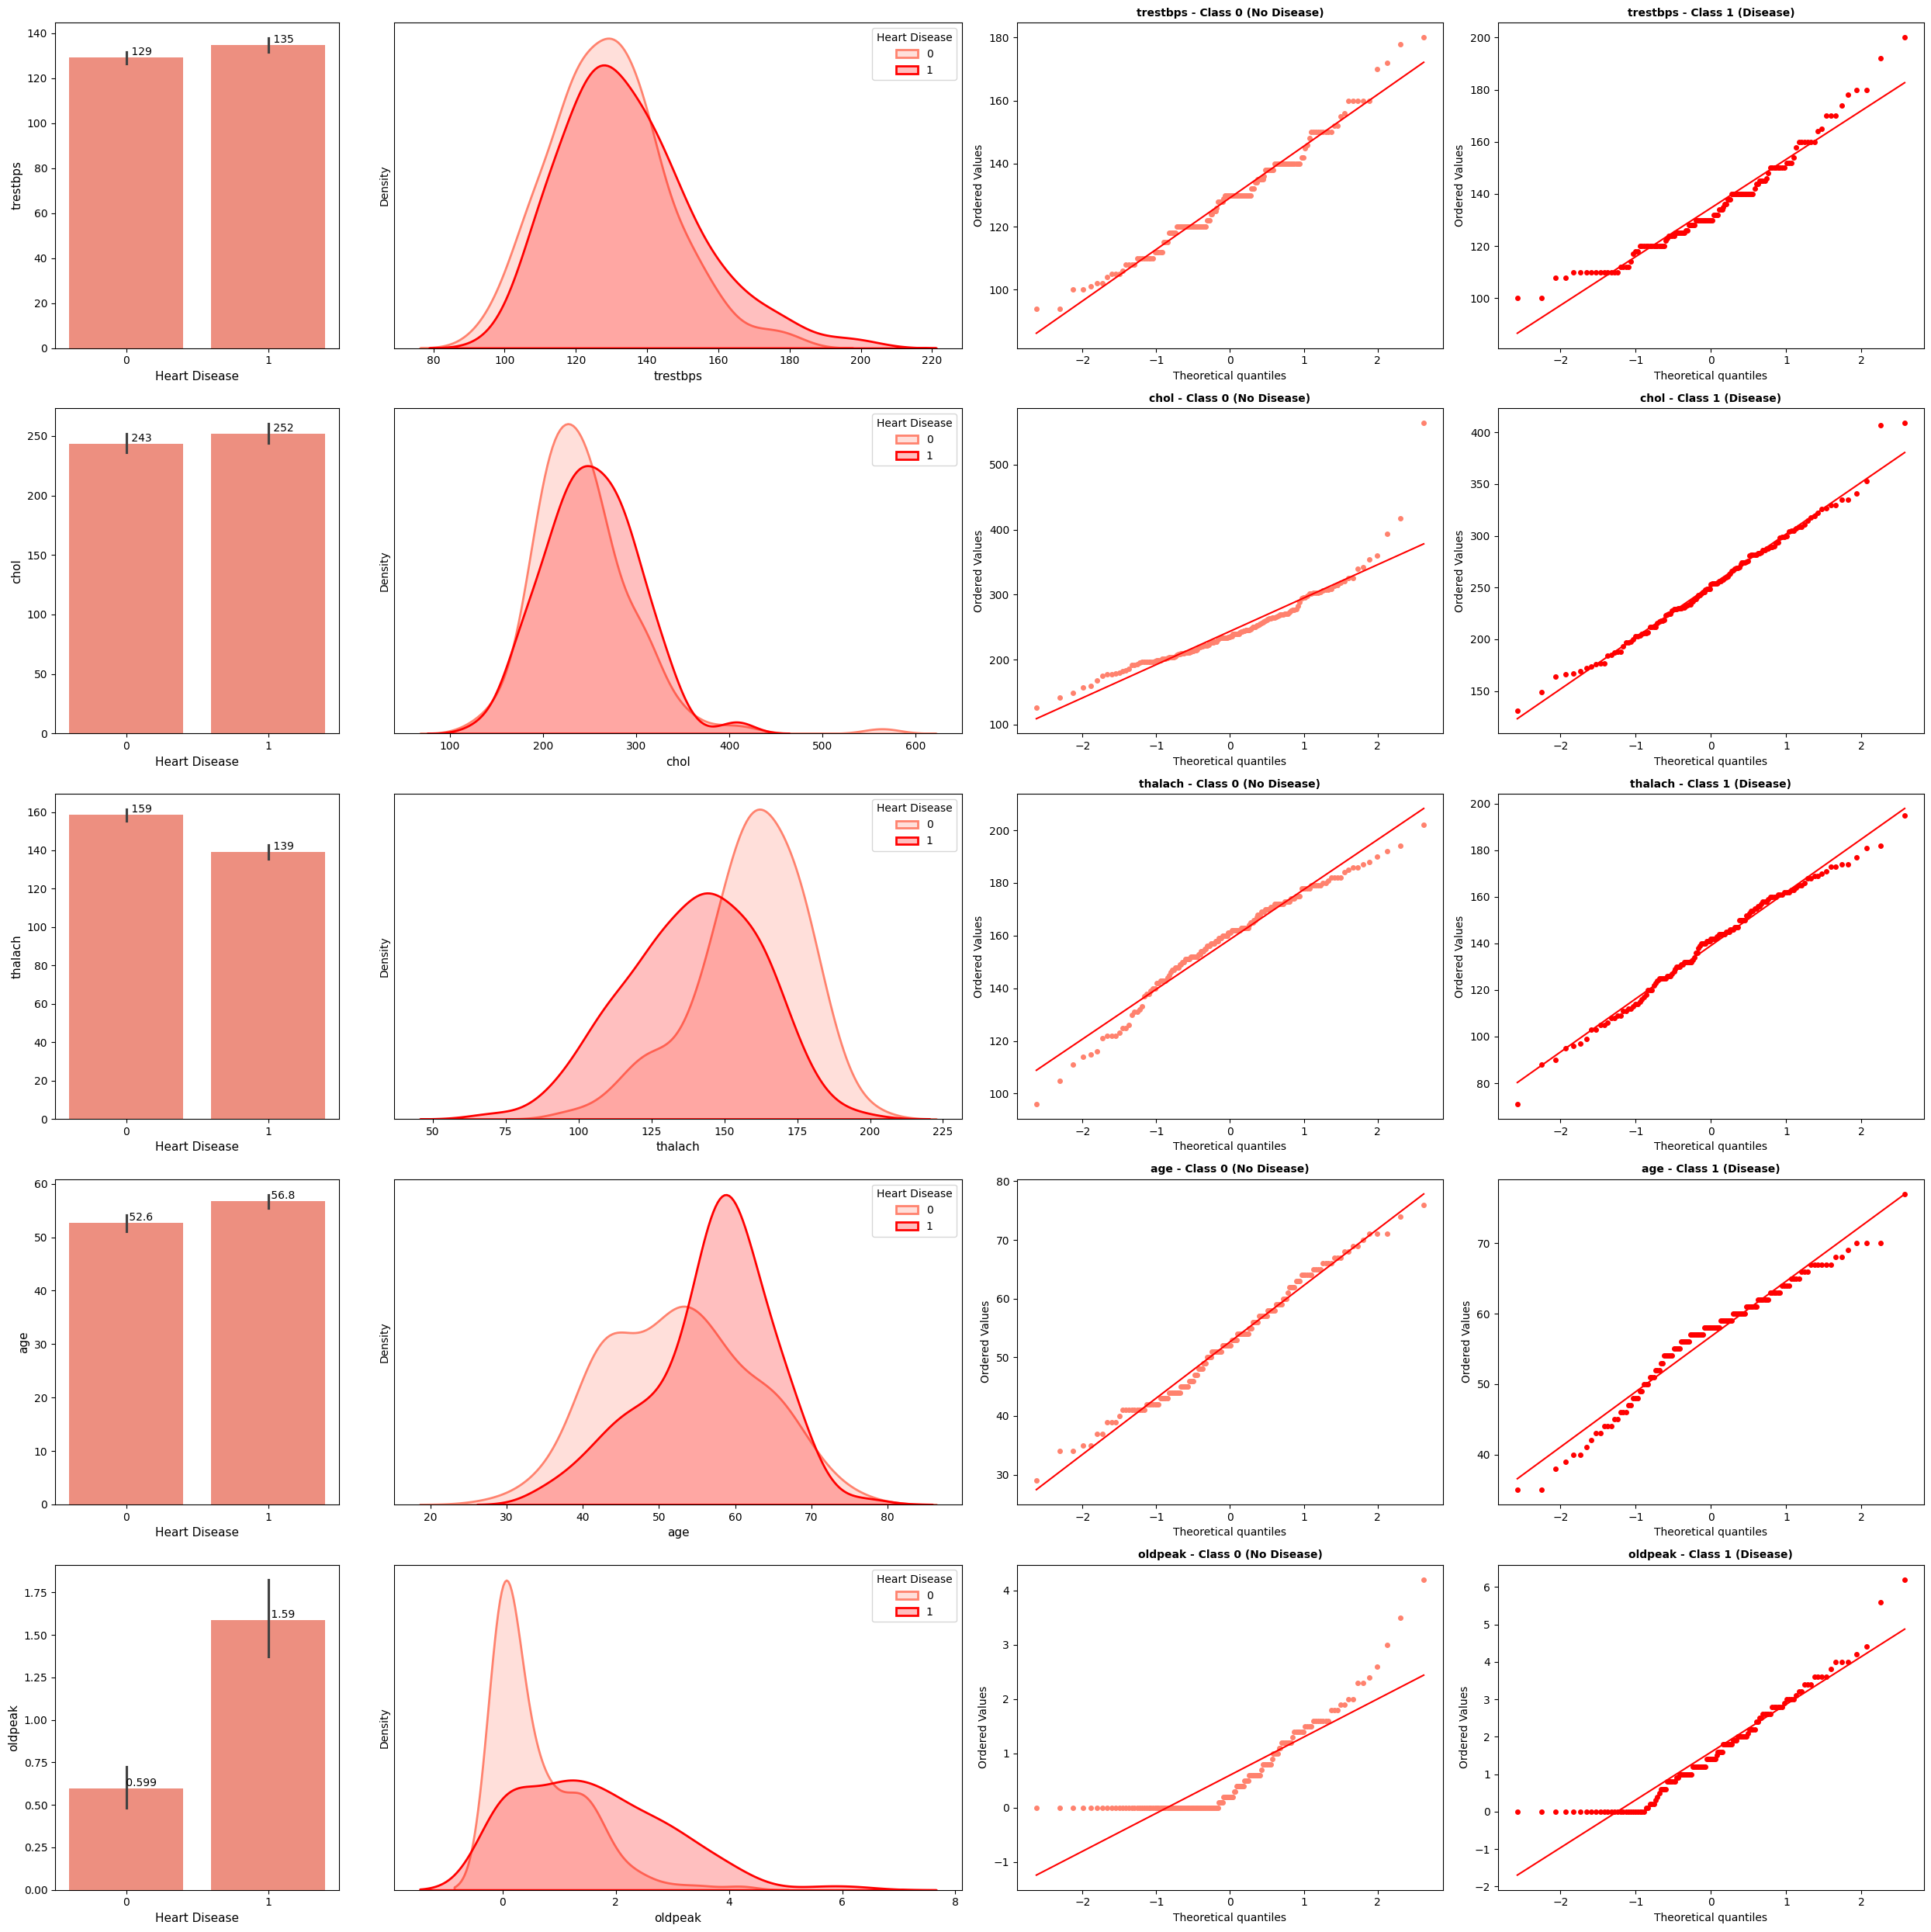

In [2]:
print("=" * 80)
print("DATA LOADING")
print("=" * 80)

# Create necessary directories for storing results and visualizations
os.makedirs("data", exist_ok=True) 
os.makedirs("img", exist_ok=True)

# Set random seed for reproducibility
np.random.seed(42)

print("Loading heart disease dataset from UCI repository")
X, y = load_heart_disease_data()
print(f"Dataset loaded successfully")
print(f"  - Features shape: {X.shape}")
print(f"  - Target shape: {y.shape}")
print(f"  - Target distribution:\n{y.value_counts()}\n")

print("=" * 80)
print("DATA PREPROCESSING")
print("=" * 80)

print("Preprocessing dataset")
dataset = preprocess_heart_disease_data(X, y)

print("Outliers:" + "\n")
outliers = find_outliers(dataset)
print(find_outliers(dataset))
print("Total outliers: " + str(sum(outliers)) + "\n")

print(f"Preprocessing completed")
print(f"  - Final dataset shape: {dataset.shape}")
print(f"  - Number of features: {dataset.shape[1] - 1}")
print(f"  - Features: {list(dataset.drop('num', axis=1).columns)}\n")

print("Plot distribution and qq-plots of continuous features")
plot_continuous_distributions_with_qq(dataset)


Plot correlation heatmap of continuous features


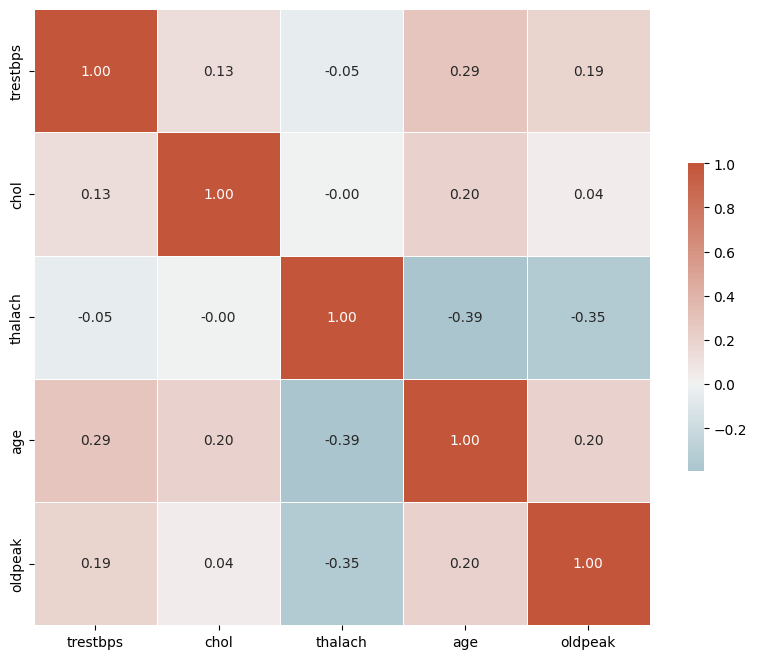

In [3]:
print("Plot correlation heatmap of continuous features")
plot_correlation_heatmap(dataset)

# Models Testing


PERFORMING MODEL SELECTION AND HYPERPARAMETER TUNING ON A RANGE OF MODELS TO COMPARE THEIR AVERAGE STATISTICS
Computing models cross validation statistics over multiple rounds

PERFORMANCE ANALYSIS
Average performance metrics comparison results:


,Model,Mean AUC,Training Time (ms)
0,Logistic Regression,0.906 ± 0.003,0.53913 ± 0.00640
1,Custom Naive Bayes,0.897 ± 0.004,6.28442 ± 0.67083
2,Decision Trees,0.818 ± 0.005,0.58347 ± 0.01202
3,SVM,0.903 ± 0.003,3.84771 ± 0.09413



PAIRWISE STATISTICAL COMPARISON OF MODELS (Paired t-test with Bonferroni)

Logistic Regression vs Custom Naive Bayes:
  Mean Difference: 0.0093 ± 0.0222
  t-statistic: 4.1878
  p-value: 0.000061
  Significant (α = 0.008333): Yes

Logistic Regression vs Decision Trees:
  Mean Difference: 0.0884 ± 0.0418
  t-statistic: 21.1523
  p-value: 0.000000
  Significant (α = 0.008333): Yes

Logistic Regression vs SVM:
  Mean Difference: 0.0038 ± 0.0119
  t-statistic: 3.1834
  p-value: 0.001946
  Significant (α = 0.008333): Yes

Custom Naive Bayes vs Decision Trees:
  Mean Difference: 0.0791 ± 0.0462
  t-statistic: 17.1052
  p-value: 0.000000
  Significant (α = 0.008333): Yes

Custom Naive Bayes vs SVM:
  Mean Difference: -0.0055 ± 0.0201
  t-statistic: -2.7370
  p-value: 0.007351
  Significant (α = 0.008333): Yes

Decision Trees vs SVM:
  Mean Difference: -0.0846 ± 0.0415
  t-statistic: -20.3570
  p-value: 0.000000
  Significant (α = 0.008333): Yes


Significant differences found in 6 comparison(

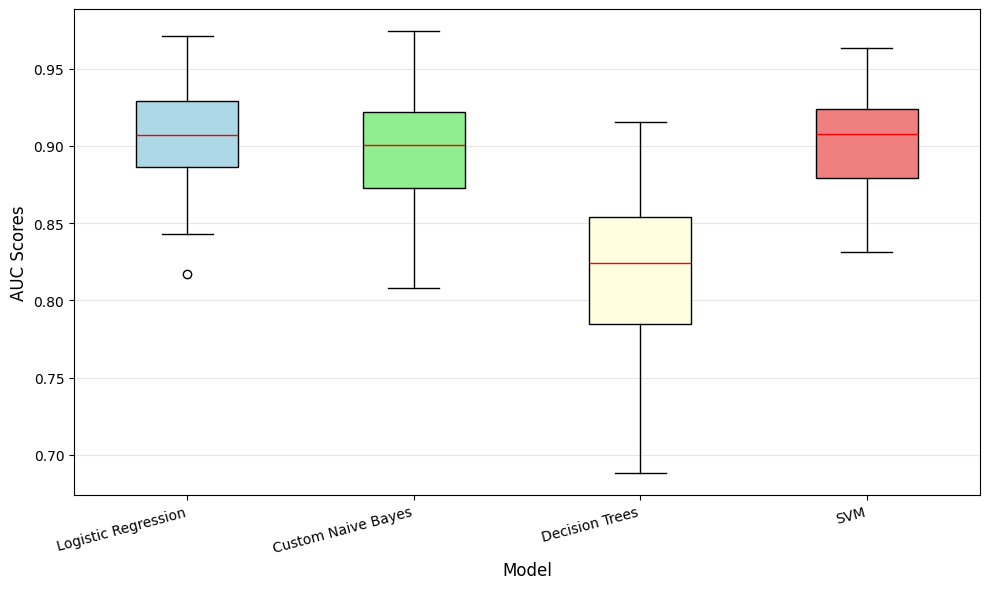

Hyperparameter distribution for each model:


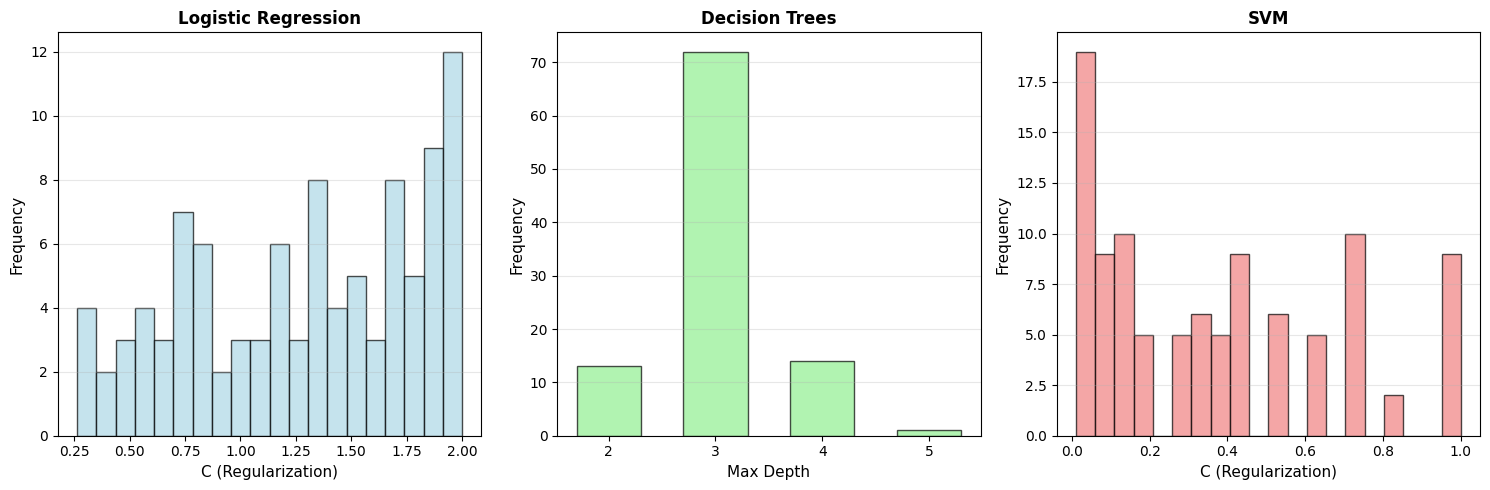

In [4]:
print("\n" + "=" * 80)
print("PERFORMING MODEL SELECTION AND HYPERPARAMETER TUNING ON A RANGE OF MODELS TO COMPARE THEIR AVERAGE STATISTICS")
print("=" * 80)

print("Computing models cross validation statistics over multiple rounds")
comparison_results, average_comparison_results = compare_model_statistics(dataset, n_rounds=100)

print("\n" + "=" * 80)
print("PERFORMANCE ANALYSIS")
print("=" * 80)

print("Average performance metrics comparison results:")
display(average_comparison_results)

comparison_df = pairwise_model_comparison(comparison_results, alpha=0.05)

print_statistical_summary(comparison_df)

print("Distribution of the AUC values for each model:")
plot_auc_boxplots(comparison_results)

print("Hyperparameter distribution for each model:")
plot_hyperparameter_distributions(comparison_results)